# Intro to Data Sciecne (71253) - Problem Set 4

## Saar Pardo

## 1. Swain vs. Alabama, 1956

Swain was a black man convicted of rape in Alabama in 1956.  
The conviction was appealed, in part on the grounds that there were no black jurors.  
26% of the eligble jury pool were black.  
Swain's jury panel consisted of 100 men, 8 of which were black. (all were later excluded from the final jury).

The appeal was rejected by the Supreme Court, stating that the "overall percentage disparity has been small".

We are going to study whether this statement is valid statistically.

### 1.1 How many black jurors are in a random sample? 

Write a functions that draws at random a jury panel of 100 people from an eligble population with 26% blacks and returns the number of black jurors.  
> The numpy `rand` function may be useful. 

In [7]:
import numpy as np

AL_pop = np.zeros(5000000)
num_black = int(0.26 * len(AL_pop))
AL_pop[:num_black] = 1
np.random.shuffle(AL_pop)


def pop_to_sapmle(pop,sample):
    sample = np.random.choice(pop, sample)
    blacks_num = sample.sum()
    # print(f"There are {blacks_num} black jurors in the sample")
    return blacks_num

In [8]:
pop_to_sapmle(AL_pop,100)

45.0

### 1.2 What is the distribution of number of black jurors in a random panel?

Use the function you've created to compute the number of black jurors in 1000 random panels.  
Plot the distribution of that number.

In [11]:
sample = 100
runs = 1000
diffs = np.zeros(runs)
for ii in range(runs):
    diffs[ii] = pop_to_sapmle(AL_pop,sample)

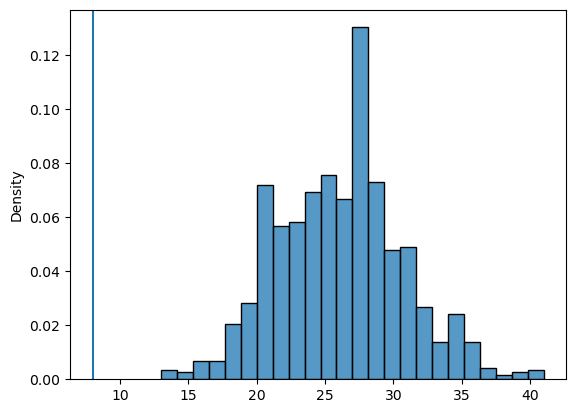

In [12]:
import seaborn as sns
ax = sns.histplot(diffs, stat='density')
ax.axvline(8)

### 1.3 What is the probability of getting a panel with 8 or less black jurors in a random panel?

In [14]:
# the probability of 8 panel or less black jurors is 0 (pv)
larger = np.where(diffs<=8, 1, 0)
p_val = np.sum(larger)/runs
print(f"The probabilty if getting a panel with 8 or less black jurors in a random panel [p-value] is a {p_val}")

The probabilty if getting a panel with 8 or less black jurors in a random panel [p-value] is a 0.0


### 1.4 Given your results, what do you think of the Supreme Court's statement about the disparity between the number of blacks in the population and in the panle?

Given the 26% precentage of eligable black jurors, the Supreme court's statement regarding the percentage gap is incorrect since the chance of a random sample of 8% black jurors or less is zero

*** 

## 2. Comparing wine ratings across countries

Wine magazine ranks wines from all over the world on a 100-point scale.   
We would like to see whether some countries make better wines. We will focus on 4 countries: Cyprus, India, Chile, and Israel.  
A dataset of ratings from the magazine is provided in the file 'wine.csv'. The rating is given by the 'points' variable.

In [20]:
import pandas as pd
from matplotlib import pyplot as plt
wine=pd.read_csv("wine.csv")

In [21]:
focus_on = ['Cyprus', 'India', 'Chile', 'Israel']
filtered_wine = wine.groupby("country").filter(lambda x: x.name in focus_on).reset_index(drop=True)

In [22]:
# filtered_wine['taster_name'].unique()
filtered_wine.groupby(by=["country","taster_name"]).size()

country  taster_name      
Chile    Joe Czerwinski         23
         Matt Kettmann           1
         Michael Schachner    4337
Cyprus   Susan Kostrzewa        11
India    Mike DeSimone           9
Israel   Lauren Buzzeo         205
         Mike DeSimone         294
         Susan Kostrzewa         1
dtype: int64

### 2.1 Plot the ratings of wines from the 4 countries of interest (Cyprus, India, Chile, and Israel).


> Pick any plot type that you think is most informative and jusitfy your choice.  
> You may pick more than one plot type. If you do, explain why multiple plot types are needed.

The most informative for me is the violinplot because i can see clearly the distribution and quantiles
in other graphs a chose to use more fields that may affect the score distribution. 
I've noticed that in each country there was only one major taster except israel the points shared based on 2 taster's opinion.
The scatter plot show that there are much less wines score for Cyprus and India compared to Israel and Chile

<Axes: xlabel='country', ylabel='points'>

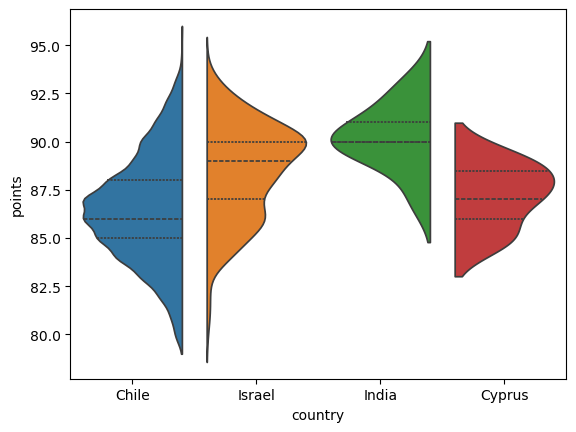

In [26]:
fig, ax = plt.subplots()
sns.violinplot(data=filtered_wine, x="country", y="points", ax=ax,hue="country",split=True, inner="quart", fill=True,)

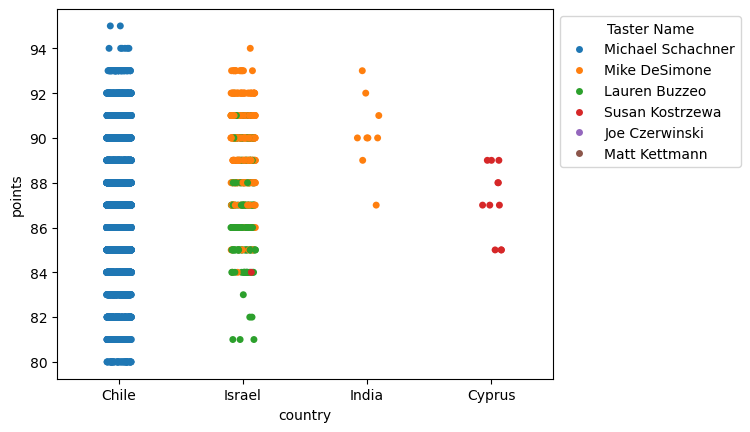

In [27]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
sns.stripplot(data=filtered_wine, x="country", y="points",hue="taster_name", ax=ax)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Taster Name')

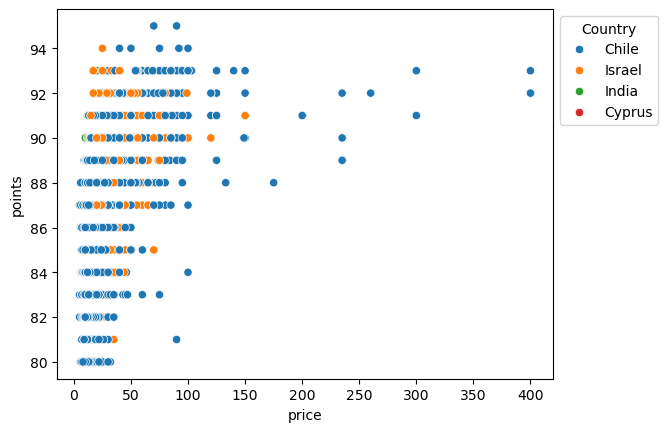

In [28]:
fig, ax = plt.subplots()
sns.scatterplot(data=filtered_wine, x='price', y='points', hue='country', ax=ax)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Country')

### 2.2 What is the median rating of wines from each of the countries of interest?  

In [30]:
w = wine.groupby("country")
for i in focus_on:
    d = w.get_group(i)
    print(f" The median rating of {i}'s wines is: {d['points'].median()}")

 The median rating of Cyprus's wines is: 87.0
 The median rating of India's wines is: 90.0
 The median rating of Chile's wines is: 86.0
 The median rating of Israel's wines is: 89.0


### 2.3 What are the standard errors of these medians? 

In [32]:
# Im not sure I understood the question... to find a distribution for one single median I need to performe bootstrap 
medians = np.array([87, 90, 86, 89])
print(f"the standard error of the four medians is: {medians.std()}")

the standard error of the four medians is: 1.5811388300841898


*** 

## 3. Testing for statistical significance in ratings across countries

We want to compare the median ratings of wines from different countries. As our test statistic (MOE), we will use the difference in median ratings between a pair of countries. 

### 3.1 What should be our null hypothesis (H0) when testing for differences in medians across countries?

Our null Hypothesis sould by thae `median_c1-median_c2 = 0` . means that there is no difference in medians across countries

### 3.2 For each pair of countries, compute the observed test statistic. 

In [39]:
medians = wine.groupby(['country'], as_index=False)['points'].median()

pairs = []
for country1 in medians['country'].tolist():
    for country2 in medians['country'].tolist():
        if country1 < country2:  
            pairs.append((country1, country2))
d = {}
for pair in pairs:
    country1, country2 = pair
    diff = abs(medians[medians['country'] == country2]['points'].values[0] - 
               medians[medians['country'] == country1]['points'].values[0])
    d[pair] = diff

diff_df = pd.DataFrame([(k[0], k[1], v) for k, v in d.items()], 
                       columns=['country1', 'country2', 'amd_t_test'])

#amd for absolute median differenece

### 3.3 For each pair of countries, use a permutation test with 1000 permutations to compute a p-value. 

In [67]:
def p_value_calculator(c1, c2):
    if (c1, c2) in d:
        t_test = d[(c1, c2)]
    elif (c2, c1) in d:
        t_test = d[(c2, c1)]
    else:
        raise ValueError(f"No t-statistic found for countries {c1} and {c2}")
    df = wine[(wine['country']==c1)|(wine['country']==c2)][['country','points']]
    runs = 1000
    diffs = np.zeros(runs)
    for ii in range(runs):
        df['country_shuffled'] = df['country'].sample(frac=1, replace=False).values
        grouped = df.groupby("country_shuffled", observed=True)['points'].median()
        diffs[ii]= np.abs(grouped[c1] - grouped[c2])
    larger = np.where(diffs>=t_test, 1, 0)
    p_val = np.sum(larger)/runs
    print(f'For {c1} and {c2}, The probability to see the value {t_test} or greater (in absolute value) is: {p_val}')

In [73]:
p_value_calculator('India', 'Chile')

For India and Chile, The probability to see the value 4.0 or greater (in absolute value) is: 0.005


### 3.4 Are the p-values you computed one-sided or two sided?  
If your answer is one-sided, how would you change you computation to obtain two-sided p-values?   
If your answer is two-sided, how would you change you computation to obtain one-sided p-values? 

My answer is two-sided so for one-sided I would not use an absolute value as a t-test. then the calculation relates to country1 median as greater then country2 median and not just differ from 0

### 3.5 How do you interpret the p-value you got for the compariosn chile-Israel and for the comparion India-Cyprus?

In [75]:
p_value_calculator('Chile', 'Israel')
p_value_calculator('India', 'Cyprus')

For Chile and Israel, The probability to see the value 3.0 or greater (in absolute value) is: 0.0
For India and Cyprus, The probability to see the value 3.0 or greater (in absolute value) is: 0.057


According to 1000 permutation test and the size of those wines samples:
1. For Chile-Israel case the probabilty for same or greater value than 3.0 in the difference between the medians is 0.0%.
2. The India-Cyprus sample is much smaller, the probabilty to find greater value than 3.0 in other sample is 5.7%.


### 3.6 These two p-values should be quite different from each other (if they aren't, double-check your previous answers). Why might they be so different?

The difference in samples size affect

In [93]:
filtered_wine['country'].value_counts()

country
Chile     4472
Israel     505
Cyprus      11
India        9
Name: count, dtype: int64